In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
df = pd.read_excel('Sample3YNew.xlsx')

In [3]:
print(df)

    Week Start  Software Bookings
0   2021-08-01         129.808103
1   2021-08-08         122.962071
2   2021-08-15         153.664518
3   2021-08-22         234.772937
4   2021-08-29         214.594944
..         ...                ...
151 2024-06-23         470.627747
152 2024-06-30         255.512305
153 2024-07-07         362.050456
154 2024-07-14         883.347637
155 2024-07-21        2010.113923

[156 rows x 2 columns]


In [13]:
df.head()

,Week Start,Bookings
0,2021-08-01,129.808103
1,2021-08-08,122.962071
2,2021-08-15,153.664518
3,2021-08-22,234.772937
4,2021-08-29,214.594944


In [15]:
df.set_index('Week Start',inplace=True)

In [16]:
df.head()

,Bookings
Week Start,
2021-08-01,129.808103
2021-08-08,122.962071
2021-08-15,153.664518
2021-08-22,234.772937
2021-08-29,214.594944


In [17]:
df.describe()

,Bookings
count,156.000000
mean,300.856753
std,289.476666
min,72.686246
25%,163.728986
50%,211.040873
75%,292.542353
max,2010.113923


<Axes: xlabel='Week Start'>

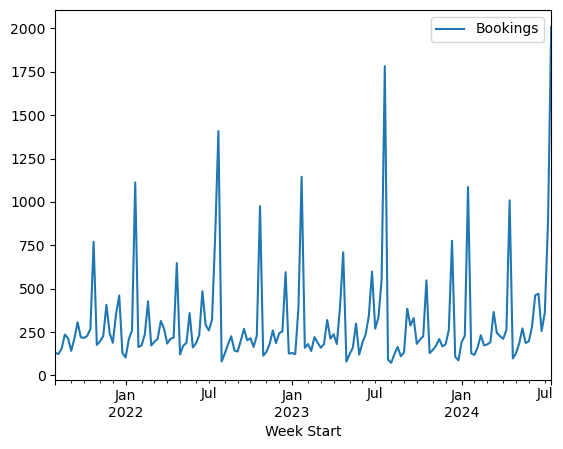

In [18]:
#Step 2. Visualize the Data
df.plot()

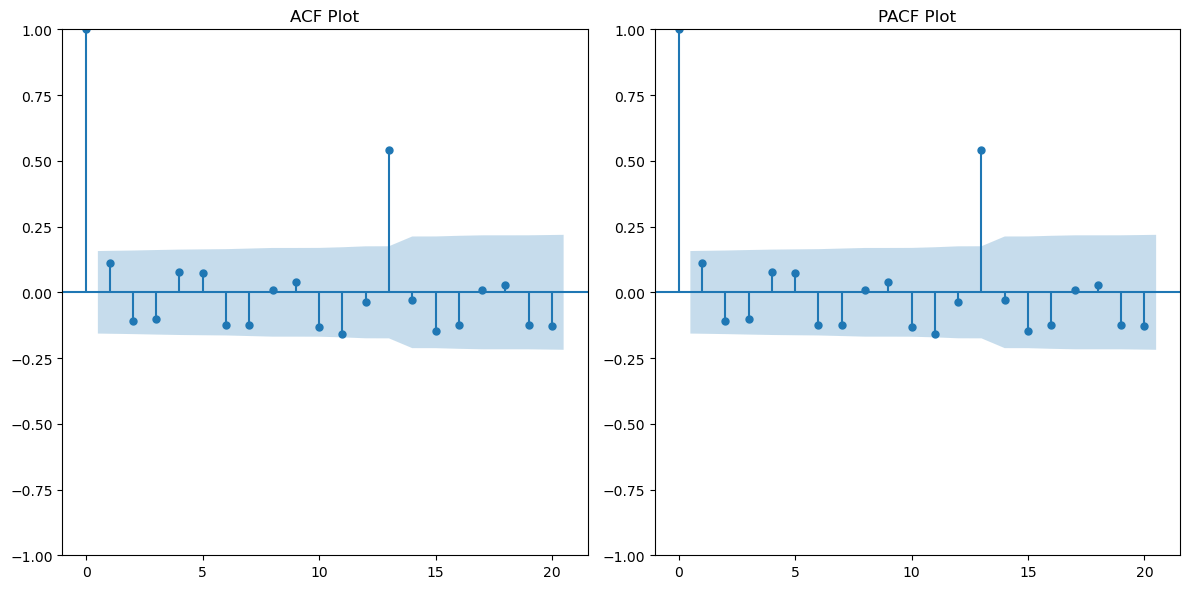

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#ACF plot- Autocorrelation function to get the p value i.e. Max value after which it diminishes (has to be integer)
plt.figure(figsize =(12,6))
plt.subplot(1,2,1)# grid size
plot_acf(df,lags=20, ax=plt.gca()) #display auto correlation values for the first 20 lags 
plt.title('ACF Plot')

#PACF plot-Partial Autocorrelation to get the p value i.e. Max value after which it diminishes (has to be integer)
plt.subplot(1,2,2)# grid size
plot_acf(df,lags=20, ax=plt.gca()) #display auto correlation values for the first 20 lags 
plt.title('PACF Plot')

plt.tight_layout()
plt.show()

In [20]:
###Testing for Stationarity

from statsmodels.tsa.stattools import adfuller

In [21]:
#Null Hypo: It is non stationary
#Alternate Hypo: It is stationary
#95% CI considered

def adfuller_test(Bookings):
    result=adfuller(Bookings)
    labels=['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value, label in zip(result,labels):
        print(label+':'+str(value))
    if result[1] <=.05:
        print("Strong evidence against null hypo")
    else:
        print("Weak evidence against null hypo")

In [22]:
adfuller_test(df['Bookings'])

ADF Test Statistic:-2.3077418590295036
p-value:0.16948322418583717
#Lags Used:13
Number of Observations Used:142
Weak evidence against null hypo


In [23]:
#### If it is non stationary we have to make it Stationary
### Differencing
df['Seasonal First Difference']=df['Bookings']-df['Bookings'].shift(13)

In [24]:
df.head(15)

,Bookings,Seasonal First Difference
Week Start,,
2021-08-01,129.808103,NaN
2021-08-08,122.962071,NaN
2021-08-15,153.664518,NaN
2021-08-22,234.772937,NaN
2021-08-29,214.594944,NaN
2021-09-05,141.077460,NaN
2021-09-12,212.493876,NaN
2021-09-19,305.957476,NaN
2021-09-26,219.117424,NaN


In [25]:
### Again performing adfuller_test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic:-3.8394071447095457
p-value:0.0025289066544253542
#Lags Used:13
Number of Observations Used:129
Strong evidence against null hypo


<Axes: xlabel='Week Start'>

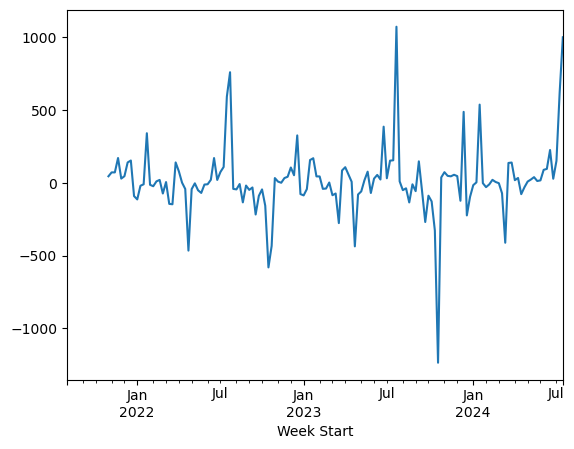

In [26]:
### Plotting the graph
df['Seasonal First Difference'].plot()

In [27]:
### For non-seasonal data
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['Bookings'],order=(1,1,1),seasonal_order=(1,1,1,13))

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


In [28]:
results=model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.07132D+00    |proj g|=  3.72369D-02

At iterate    5    f=  6.06224D+00    |proj g|=  4.88560D-03

At iterate   10    f=  6.05993D+00    |proj g|=  3.71966D-03



 This problem is unconstrained.


At iterate   15    f=  5.98195D+00    |proj g|=  6.24761D-02

At iterate   20    f=  5.92508D+00    |proj g|=  9.77121D-03

At iterate   25    f=  5.90088D+00    |proj g|=  2.07843D-03

At iterate   30    f=  5.90064D+00    |proj g|=  6.35393D-03

At iterate   35    f=  5.90059D+00    |proj g|=  4.83791D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     46      1     0     0   4.838D-06   5.901D+00
  F =   5.9005907579378416     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


<Axes: xlabel='Week Start'>

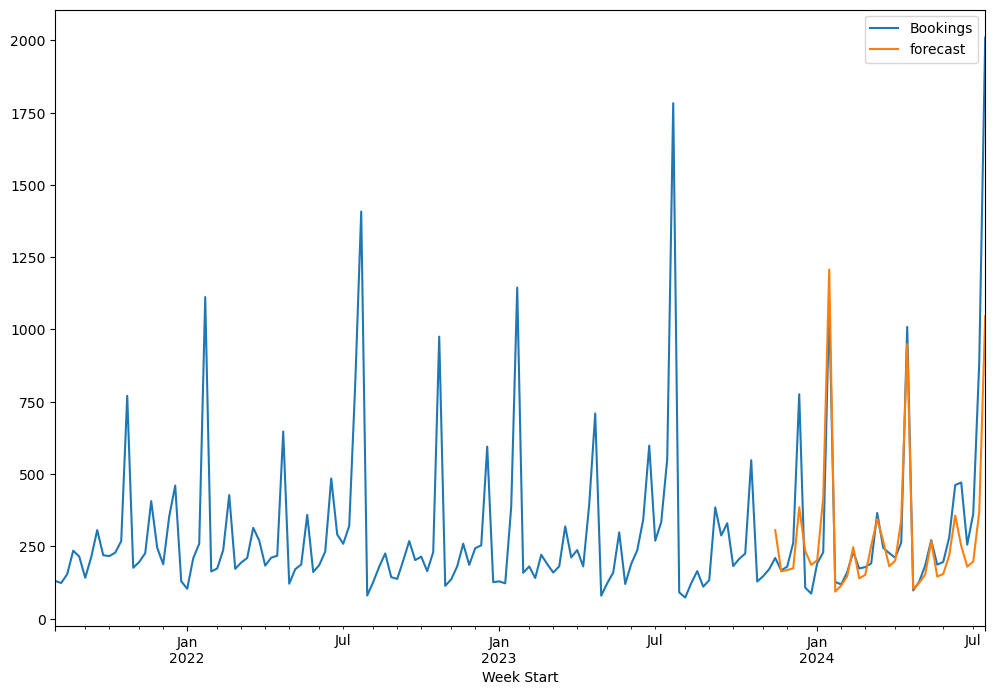

In [29]:
df['forecast']=results.predict(start=120, end = 156, dynamic=True) # testing the model performance with sample input
df[['Bookings','forecast']].plot(figsize=(12,8))

In [30]:
### Predicting future forecast
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+DateOffset(weeks=x)for x in range(0,26)] # Creating future weeks- 26 weeks placeholder

In [31]:
future_dataset_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_dataset_df.index.name = 'Week Start'

In [32]:
future_dataset_df.head()

,Bookings,Seasonal First Difference,forecast
Week Start,,,
2024-07-28,NaN,NaN,NaN
2024-08-04,NaN,NaN,NaN
2024-08-11,NaN,NaN,NaN
2024-08-18,NaN,NaN,NaN
2024-08-25,NaN,NaN,NaN


In [33]:
# fill NaN values with float
future_dataset_df['Bookings']= future_dataset_df['Bookings'].fillna(0.0)
future_dataset_df['Seasonal First Difference']= future_dataset_df['Seasonal First Difference'].fillna(0.0)
future_dataset_df['forecast']= future_dataset_df['forecast'].fillna(0.0)
future_dataset_df.head()

,Bookings,Seasonal First Difference,forecast
Week Start,,,
2024-07-28,0.0,0.0,0.0
2024-08-04,0.0,0.0,0.0
2024-08-11,0.0,0.0,0.0
2024-08-18,0.0,0.0,0.0
2024-08-25,0.0,0.0,0.0


In [34]:
# fill NaN values with float for original dataframe
df['Bookings']= df['Bookings'].fillna(0.0)
df['Seasonal First Difference']= df['Seasonal First Difference'].fillna(0.0)
df['forecast']= df['forecast'].fillna(0.0)
df.head()

,Bookings,Seasonal First Difference,forecast
Week Start,,,
2021-08-01,129.808103,0.0,0.0
2021-08-08,122.962071,0.0,0.0
2021-08-15,153.664518,0.0,0.0
2021-08-22,234.772937,0.0,0.0
2021-08-29,214.594944,0.0,0.0


In [35]:
future_df=pd.concat([df,future_dataset_df])

<Axes: xlabel='Week Start'>

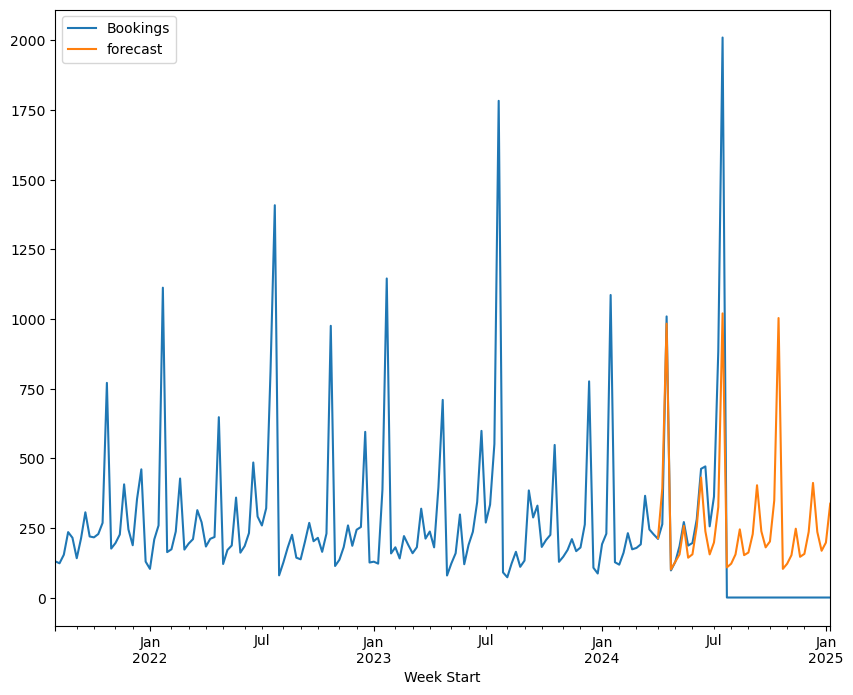

In [36]:
future_df['forecast']=results.predict(start=140, end=180, dynamic=True)
future_df[['Bookings','forecast']].plot(figsize=(10,8))

In [37]:
future_df1=future_df[future_df['forecast'].notna()]
# check the forecast values along with the bookings for the last weeks
print(future_df1)

               Bookings  Seasonal First Difference     forecast
Week Start                                                     
2024-04-07   210.389104                  19.145915   213.357951
2024-04-14   263.200429                  34.220824   391.907063
2024-04-21  1009.011981                 -76.905784   983.041502
2024-04-28    97.261724                 -29.449396   100.760294
2024-05-05   127.444699                   9.525840   127.732359
2024-05-12   184.174379                  23.355634   154.720173
2024-05-19   270.958808                  39.920855   257.107299
2024-05-26   186.469292                  13.407451   142.973911
2024-06-02   195.795595                  17.757774   155.050595
2024-06-09   280.900803                  89.980444   254.902886
2024-06-16   461.896416                  96.731837   430.900755
2024-06-23   470.627747                 226.311910   237.886108
2024-06-30   255.512305                  29.082576   154.807372
2024-07-07   362.050456                 

In [38]:
# Save the new dataframe in the workbook
from openpyxl import Workbook  # openpyxl helps to read and write data in excel
future_df1.to_excel('output_newdata.xlsx', index=True, engine='openpyxl')
print('Yes the file is downloading...')

Yes the file is downloading...
